In [18]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data_dir = "/data/train"
ben_dir = os.path.join(data_dir, "Benign")
ben_imgs = os.listdir(ben_dir)
mal_dir = os.path.join(data_dir, "Malignant")
mal_imgs = os.listdir(mal_dir)

In [20]:
num_ben_imgs = len(ben_imgs)
num_mal_imgs = len(mal_imgs)
ben_ratio = round(num_ben_imgs / (num_ben_imgs + num_mal_imgs), 4)
mal_ratio = 1 - ben_ratio
print("Number of benign images in test set: {} ({}%)".format(num_ben_imgs, ben_ratio*100))
print("Number of malignant images in test set: {} ({}%)".format(num_mal_imgs, mal_ratio*100))

Number of benign images in test set: 6289 (52.94%)
Number of malignant images in test set: 5590 (47.06%)


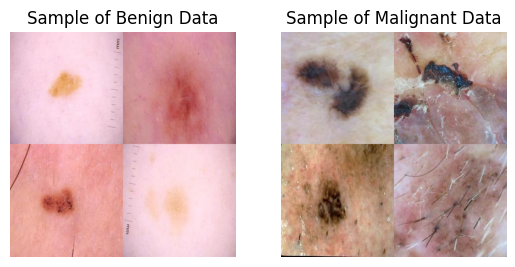

In [21]:
sample_ben_imgs = ben_imgs[:4]
sample_mal_imgs = mal_imgs[:4]

fig = plt.figure()
ben_sample_top = cv2.hconcat([cv2.imread(os.path.join(ben_dir, sample_ben_imgs[0])), cv2.imread(os.path.join(ben_dir, sample_ben_imgs[1]))])
ben_sample_bot = cv2.hconcat([cv2.imread(os.path.join(ben_dir, sample_ben_imgs[2])), cv2.imread(os.path.join(ben_dir, sample_ben_imgs[3]))])
ben_sample = cv2.cvtColor(cv2.vconcat([ben_sample_top, ben_sample_bot]), cv2.COLOR_BGR2RGB)
ben_subplot = fig.add_subplot(1, 2, 1)
ben_subplot.axis("off")
plt.imshow(ben_sample)
ben_subplot.title.set_text("Sample of Benign Data")

mal_sample_top = cv2.hconcat([cv2.imread(os.path.join(mal_dir, sample_mal_imgs[0])), cv2.imread(os.path.join(mal_dir, sample_mal_imgs[1]))])
mal_sample_bot = cv2.hconcat([cv2.imread(os.path.join(mal_dir, sample_mal_imgs[2])), cv2.imread(os.path.join(mal_dir, sample_mal_imgs[3]))])
mal_sample = cv2.cvtColor(cv2.vconcat([mal_sample_top, mal_sample_bot]), cv2.COLOR_BGR2RGB)
mal_subplot = fig.add_subplot(1, 2, 2)
mal_subplot.axis("off")
plt.imshow(mal_sample)
mal_subplot.title.set_text("Sample of Malignant Data")


In [22]:
widths = []
heights = []
ben_r = []
ben_g =[]
ben_b = []
mal_r = []
mal_g = []
mal_b = []
for img_file in ben_imgs:
    img = cv2.cvtColor(cv2.imread(os.path.join(ben_dir, img_file)), cv2.COLOR_BGR2RGB)
    heights.append(img.shape[0])
    widths.append(img.shape[1])
    ben_r.append(img[:, :, 0])
    ben_g.append(img[:, :, 1])
    ben_b.append(img[:, :, 2])
ben_r = np.array(ben_r).flatten()
ben_g = np.array(ben_g).flatten()
ben_b = np.array(ben_b).flatten()

for img_file in mal_imgs:
    img = cv2.cvtColor(cv2.imread(os.path.join(mal_dir, img_file)), cv2.COLOR_BGR2RGB)
    heights.append(img.shape[0])
    widths.append(img.shape[1])
    mal_r.append(img[:, :, 0])
    mal_g.append(img[:, :, 1])
    mal_b.append(img[:, :, 2])
mal_r = np.array(mal_r).flatten()
mal_g = np.array(mal_g).flatten()
mal_b = np.array(mal_b).flatten()

print("Max image height: {}     Min image height: {}     Avg image height: {}".format(max(heights), min(heights), int(np.mean(heights))))
print("Max image width: {}     Min image width: {}     Avg image width: {}\n".format(max(widths), min(widths), int(np.mean(widths))))
print("Avg RGB values for benign images: ({}, {}, {})".format(round(np.mean(ben_r), 1), round(np.mean(ben_g), 1), round(np.mean(ben_b), 1)))
print("StD RGB values for benign images: ({}, {}, {})\n".format(round(np.std(ben_r), 1), round(np.std(ben_g), 1), round(np.std(ben_b), 1)))
print("Avg RGB values for malignant images: ({}, {}, {})".format(round(np.mean(mal_r), 1), round(np.mean(mal_g), 1), round(np.mean(mal_b), 1)))
print("StD RGB values for malignant images: ({}, {}, {})".format(round(np.std(mal_r), 1), round(np.std(mal_g), 1), round(np.std(mal_b), 1)))

Max image height: 224     Min image height: 224     Avg image height: 224
Max image width: 224     Min image width: 224     Avg image width: 224

Avg RGB values for benign images: (205.4, 152.0, 148.2)
StD RGB values for benign images: (36.7, 44.3, 48.9)

Avg RGB values for malignant images: (160.7, 130.1, 125.4)
StD RGB values for malignant images: (61.3, 57.6, 59.8)
